In [1]:
from data_flywheel import DataFlywheel

/root/miniforge-pypy3/envs/icevision/lib/python3.10/site-packages/mmcv/__init__.py:20: UserWarning: On January 1, 2023, MMCV will release v2.0.0, in which it will remove components related to the training process and add a data transformation module. In addition, it will rename the package names mmcv to mmcv-lite and mmcv-full to mmcv. See https://github.com/open-mmlab/mmcv/blob/master/docs/en/compatibility.md for more details.
  warnings.warn(
INFO     - The mmdet config folder already exists. No need to downloaded it. Path : /root/.icevision/mmdetection_configs/mmdetection_configs-2.20.1/configs | icevision.models.mmdet.download_configs:download_mmdet_configs:17


In [2]:
# Create a configuration dictionary
config = {
    'annotation_path': '/root/data-flywheel/notebooks/objectlab/pascal_voc_annotations/',
    'image_path': '/workspace/yolo_v8_training/oiv7_full/validation/',
    'log_wandb': True,
    'wandb_project': 'data-flywheel-test'
}

# Instantiate the DataFlywheel
flywheel = DataFlywheel(config)


04/04/2024 11:30:31 - ERROR - wandb.jupyter -   Failed to detect the name of this notebook, you can set it manually with the WANDB_NOTEBOOK_NAME environment variable to enable code saving.
wandb: Currently logged in as: dnth. Use `wandb login --relogin` to force relogin


wandb: Adding directory to artifact (/root/data-flywheel/notebooks/objectlab/pascal_voc_annotations)... Done. 0.7s


In [3]:
flywheel.load_annotations()

INFO     - Loading image annotations... | data_flywheel.flywheel:load_annotations:30
INFO     -   Annotations folder: /root/data-flywheel/notebooks/objectlab/pascal_voc_annotations/ | data_flywheel.flywheel:load_annotations:32
INFO     -   Image folder: /workspace/yolo_v8_training/oiv7_full/validation/ | data_flywheel.flywheel:load_annotations:33


  0%|          | 0/844 [00:00<?, ?it/s]

INFO     - Autofixing records | icevision.parsers.parser:parse:122


  0%|          | 0/844 [00:00<?, ?it/s]

WARNING  - (record_id: 0065e1098f7a353b) - 🚫 Record could not be autofixed and will be removed because: File '/workspace/yolo_v8_training/oiv7_full/validation/0065e1098f7a353b.xml' does not exist | icevision.core.record:autofix_records:100
WARNING  - (record_id: 00770ee8f5ad87ef) - 🚫 Record could not be autofixed and will be removed because: File '/workspace/yolo_v8_training/oiv7_full/validation/00770ee8f5ad87ef.xml' does not exist | icevision.core.record:autofix_records:100
WARNING  - (record_id: 00ccda615ec9731d) - 🚫 Record could not be autofixed and will be removed because: File '/workspace/yolo_v8_training/oiv7_full/validation/00ccda615ec9731d.xml' does not exist | icevision.core.record:autofix_records:100
WARNING  - (record_id: 0160b5826ab10020) - 🚫 Record could not be autofixed and will be removed because: File '/workspace/yolo_v8_training/oiv7_full/validation/0160b5826ab10020.xml' does not exist | icevision.core.record:autofix_records:100
WARNING  - (record_id: 0177ba1593d54279)

INFO     - Loading model... | data_flywheel.flywheel:train_model:56
2024-04-04 11:30:37,250 - mmcv - INFO - initialize ResNet with init_cfg {'type': 'Pretrained', 'checkpoint': 'torchvision://resnet50'}
2024-04-04 11:30:37,252 - mmcv - INFO - load model from: torchvision://resnet50
2024-04-04 11:30:37,253 - mmcv - INFO - load checkpoint from torchvision path: torchvision://resnet50
2024-04-04 11:30:37,334 - mmcv - WARNING - The model and loaded state dict do not match exactly

unexpected key in source state_dict: fc.weight, fc.bias

2024-04-04 11:30:37,352 - mmcv - INFO - initialize FPN with init_cfg {'type': 'Xavier', 'layer': 'Conv2d', 'distribution': 'uniform'}
2024-04-04 11:30:37,379 - mmcv - INFO - initialize VFNetHead with init_cfg {'type': 'Normal', 'layer': 'Conv2d', 'std': 0.01, 'override': {'type': 'Normal', 'name': 'vfnet_cls', 'std': 0.01, 'bias_prob': 0.01}}
2024-04-04 11:30:37,415 - mmcv - INFO - 
backbone.conv1.weight - torch.Size([64, 3, 7, 7]): 
PretrainedInit: load fr

load checkpoint from local path: checkpoints/vfnet/vfnet_r50_fpn_mstrain_2x_coco_20201027-7cc75bd2.pth
The model and loaded state dict do not match exactly

size mismatch for bbox_head.vfnet_cls.weight: copying a param with shape torch.Size([80, 256, 3, 3]) from checkpoint, the shape in current model is torch.Size([1, 256, 3, 3]).
size mismatch for bbox_head.vfnet_cls.bias: copying a param with shape torch.Size([80]) from checkpoint, the shape in current model is torch.Size([1]).
Could not gather input dimensions
WandbCallback was not able to prepare a DataLoader for logging prediction samples -> 'Dataset' object has no attribute 'items'


epoch,train_loss,valid_loss,COCOMetric,time
0,2.560978,1.635653,0.406197,00:25
1,2.031820,1.457711,0.432471,00:24
2,1.844737,1.489912,0.430592,00:25


/root/miniforge-pypy3/envs/icevision/lib/python3.10/site-packages/torch/functional.py:504: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at ../aten/src/ATen/native/TensorShape.cpp:3526.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]


Better model found at epoch 0 with valid_loss value: 1.6356534957885742.


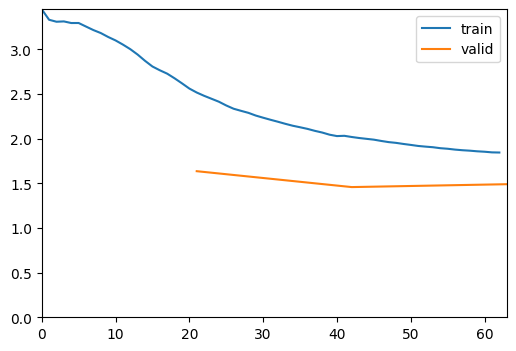

Better model found at epoch 1 with valid_loss value: 1.457710862159729.
Could not gather input dimensions


epoch,train_loss,valid_loss,COCOMetric,time
0,1.510556,1.302529,0.514753,00:26
1,1.488807,1.334776,0.499823,00:25
2,1.513720,1.418021,0.448150,00:26
3,1.505617,1.397540,0.445339,00:25
4,1.521323,1.360847,0.484872,00:26
5,1.477839,1.316066,0.498080,00:25
6,1.433712,1.313638,0.491948,00:26
7,1.392231,1.259418,0.523425,00:25
8,1.376595,1.275461,0.510874,00:25
9,1.349319,1.264381,0.519422,00:25


Better model found at epoch 0 with valid_loss value: 1.3025293350219727.


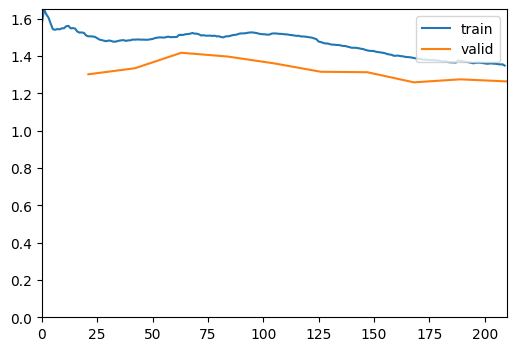

Better model found at epoch 7 with valid_loss value: 1.2594176530838013.


In [4]:
%matplotlib inline

flywheel.train_model(batch_size=32, epoch=10, freeze_epoch=3)

INFO     - Identifying most incorrect examples... | data_flywheel.flywheel:get_most_wrong:97
INFO     - Losses returned by model: ['loss_cls', 'loss_bbox'] | icevision.models.interpretation:plot_top_losses:220


  0%|          | 0/161 [00:00<?, ?it/s]

  0%|          | 0/21 [00:00<?, ?it/s]

COCOMetric,▁▃▂▇▇▄▃▆▆▆█▇█
epoch,▁▁▁▂▂▂▂▂▂▃▃▃▃▃▄▄▄▄▄▄▅▅▅▅▅▅▆▆▆▆▆▇▇▇▇▇▇███
eps_0,▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
eps_1,▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
eps_2,▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
eps_3,▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
eps_4,▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
eps_5,▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
eps_6,▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
lr_0,▁▂▂▃▄▅▇██▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
lr_1,▁▂▂▃▄▅▇██▁▁▁▁▁▂▂▂▂▂▂▂▂▂▂▂▂▂▁▁▁▁▁▁▁▁▁▁▁▁▁


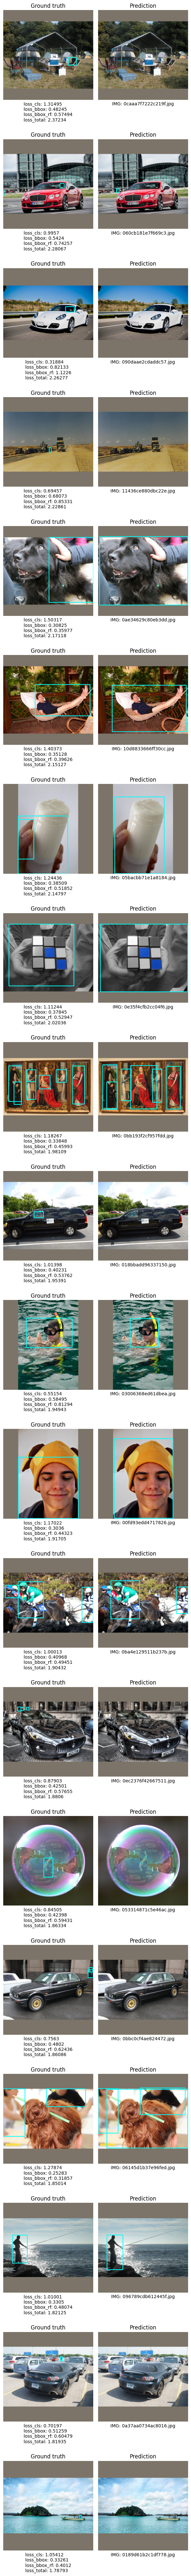

In [5]:
annotations_to_review = flywheel.get_most_wrong(method='top-loss')

In [6]:
annotations_to_review

['0caaa7f7222c219f.xml',
 '060cb181e7f669c3.xml',
 '090daae2cdaddc57.xml',
 '11436ce880dbc22e.xml',
 '0ae34629c80eb3dd.xml',
 '10d8833666ff30cc.xml',
 '05bacbb71e1a8184.xml',
 '0e35f4cfb2cc04f6.xml',
 '0bb193f2cf957fdd.xml',
 '018bbadd96337150.xml',
 '03006368ed61dbea.xml',
 '00fd93edd4717826.xml',
 '0ba4e129511b237b.xml',
 '0ec2376f42667511.xml',
 '053314871c5e46ac.xml',
 '0bbc0cf4ae824472.xml',
 '06145d1b37e96fed.xml',
 '096789cdb612445f.xml',
 '0a37aa0734ac8016.xml',
 '0189d61b2c1df778.xml',
 '032df358837dfe26.xml',
 '0a8657e8b5c9d7bb.xml',
 '05efcfa6edaf57d2.xml',
 '0c3faec726e97005.xml',
 '003a5aaf6d17c917.xml',
 '005ea49186b013d8.xml',
 '0a4c4ab517c2900e.xml',
 '043f3655deab6e7c.xml',
 '0f3c2228fb89a3d2.xml',
 '06294ef356d77e7e.xml',
 '04256099a6f9032f.xml',
 '08372798f2cf334b.xml',
 '0e78d30f3c9e4506.xml',
 '04833bdaa8c68594.xml',
 '0cdeaf8125c57fce.xml',
 '0e3a594ea52ffed1.xml',
 '09a0196247b827e2.xml',
 '00b4064b073e51f3.xml',
 '068921685a717645.xml',
 '0859787e55aeed35.xml',


In [7]:
flywheel.relabel_data()

INFO     - Launching streamlit to review annotations... | data_flywheel.flywheel:relabel_data:125
INFO     - Review annotations here: http://0.0.0.0:8501 | data_flywheel.flywheel:relabel_data:126


KeyboardInterrupt: 